libraries used in project

1. pandas

2. matplotlib : to Visualize Data

3. opencv-python (OpenCV) : Detects pollution (haze/smoke) in images using edge detection.

4. google.colab.drive : allows you to mount Google Drive directly into your Colab notebook's



In [9]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# Example: List files in your Drive folder
!ls "/content/drive/MyDrive/computervision"

clearSKY.jpeg  polluted.jpeg  pollutionIMG.png	pollution_results.xlsx


In [12]:
pollution_data = []

now we will analyze images to detect pollution

Contrast: 17.24, Brightness: 220.81, Edge Mean: 0.00, Blue Intensity: 244.95, Saturation: 51.88
Detected as sky image.
Original Image:


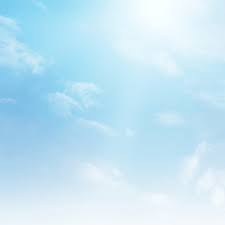

Edge Detection (Pollution Indicators):


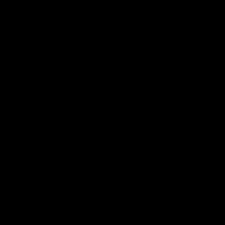


Pollution Score: 42.7/100 (higher = worse)
Air Quality: Good (Clean Air)


np.float64(42.707990123456796)

In [13]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Required for Colab image display

def detect_pollution(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            raise FileNotFoundError(f"Image not found at {image_path}")

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Used to compute brightness/contrast.
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) #Helps analyze color purity (saturation).

        # Compute contrast and brightness
        contrast = np.std(gray)
        brightness = np.mean(gray)

        # Compute edge detection
        edges = cv2.Canny(gray, 100, 200)
        edge_mean = cv2.mean(edges)[0]

        # Compute blue channel intensity (used for sky detection)
        blue_channel_mean = np.mean(img[:, :, 0])  # Extract the Blue channel

        # Compute saturation
        saturation = np.mean(hsv[:, :, 1])

        print(f"Contrast: {contrast:.2f}, Brightness: {brightness:.2f}, Edge Mean: {edge_mean:.2f}, Blue Intensity: {blue_channel_mean:.2f}, Saturation: {saturation:.2f}")

        # Determine if the image is likely a sky scene
        if contrast < 20 and blue_channel_mean > 130:  # Adjust threshold as needed
            print("Detected as sky image.")
            pollution_score = max(0, 100 - (saturation / 3))  # Reduce saturation impact # Higher = more polluted
        else:
            print("Detected as landscape image.")
            pollution_score = 100 - (edge_mean / 2)  # Pollution based on edge density

        # Adjust pollution score based on blue intensity (clear sky correction)
        if blue_channel_mean > 200 and brightness > 200:
            pollution_score = max(0, pollution_score - 40)  # Reduce pollution score for clear sky

        # Classify air quality
        if pollution_score < 25:
            air_quality = "Excellent (Very Clean Air)"
        elif pollution_score < 50:
            air_quality = "Good (Clean Air)"
        elif pollution_score < 75:
            air_quality = "Moderate (Mild Pollution)"
        else:
            air_quality = "Poor (Heavy Pollution)"

        print("Original Image:")
        cv2_imshow(img)
        print("Edge Detection (Pollution Indicators):")
        cv2_imshow(edges)
        print(f"\nPollution Score: {pollution_score:.1f}/100 (higher = worse)")
        print(f"Air Quality: {air_quality}")

        pollution_data.append({
            'Image': image_path.split('/')[-1],
            'Contrast': contrast,
            'Brightness': brightness,
            'Edge Mean': edge_mean,
            'Blue Intensity': blue_channel_mean,
            'Saturation': saturation,
            'Pollution Score': pollution_score
        })

        return pollution_score

    except Exception as e:
        print(f"Error: {str(e)}")
        return None

image_path = "/content/drive/MyDrive/computervision/clearSKY.jpeg"
detect_pollution(image_path)


Contrast: 28.55, Brightness: 126.86, Edge Mean: 10.67, Blue Intensity: 126.85, Saturation: 19.00
Detected as landscape image.
Original Image:


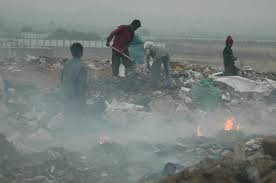

Edge Detection (Pollution Indicators):


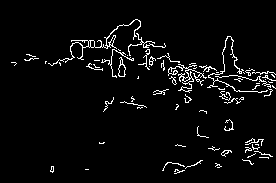


Pollution Score: 94.7/100 (higher = worse)
Air Quality: Poor (Heavy Pollution)
New image analysis complete! Score: 94.7/100


In [14]:
# Analyze the new image
new_score = detect_pollution("/content/drive/MyDrive/computervision/polluted.jpeg")
if new_score is not None:
    print(f"New image analysis complete! Score: {new_score:.1f}/100")
else:
    print("Analysis failed.")


Pollution DataFrame:
           Image   Contrast  Brightness  Edge Mean  Blue Intensity  \
0  clearSKY.jpeg  17.244542  220.807032   0.000000      244.951802   
1  polluted.jpeg  28.549684  126.861329  10.672963      126.850123   

   Saturation  Pollution Score  
0   51.876030        42.707990  
1   18.995228        94.663519  


<ipython-input-18-915d23f547f9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Image', y='Pollution Score', palette='coolwarm')


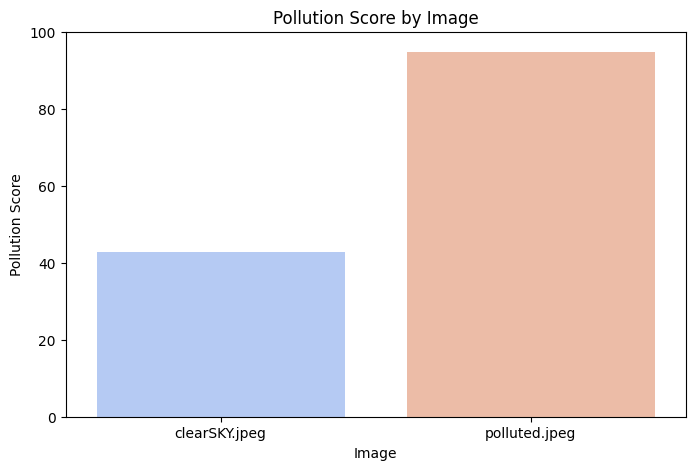

Pollution results saved to pollution_results.csv


In [18]:
# --- Data Visualization ---
if pollution_data:
    df = pd.DataFrame(pollution_data)
    print("\nPollution DataFrame:")
    print(df)

    # Bar plot for Pollution Score
    plt.figure(figsize=(8,5))
    sns.barplot(data=df, x='Image', y='Pollution Score', palette='coolwarm')
    plt.title('Pollution Score by Image')
    plt.ylabel('Pollution Score')
    plt.xlabel('Image')
    plt.ylim(0, 100)
    plt.show()

    # Save DataFrame to CSV (optional)
    df.to_csv('/content/drive/MyDrive/computervision/pollution_results.csv', index=False)
    print("Pollution results saved to pollution_results.csv")
